 ## README
 ### Supervised machine learning for the assessment of Chronic Kidney Disease advancement 
 In this notebook, an overview of the dataset used for the study is provided. Together with it, we provide an example of the proposed computational model (an ExtraTreesClassifier) trained and tested for the different classification problems defiend in the study:
 - predicting the occurrence of renal failure and dialysis within 1 year or after (binary classification)
 - predicting the occurrence of renal failure and dialysis within the first 6 months, between 6 and 18 months, or after 18 months (3 classes)
 - predicting the occurrence of renal failure and dialysis within the first 6 months, between 6 and 14 months, between 14 and 24 months, or after more than 24 months (4 classes)
 
For brevity, in this Notebook the comparison of all the evaluated algorithms is omitted, but the readers are welcome to try and compare different computational models (Decision Trees, Random Forest, Neural Networks, etc.) over different approaches (classification or regression) and different subsets of features. The details and results of the different approaches and models that have been compared in the study can be found in the original article.
 

In [1]:
import pandas as pd

In [2]:
PATH_TRAIN = "./training.csv"
PATH_TEST = "./test.csv"

In [3]:
#load training
training = pd.read_csv(PATH_TRAIN)
training.shape

(3199, 59)

In [4]:
#training overview
training.head()

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
0,20.276592,78,1,0,0,0,0,1,0,1,...,11.4,-3.652381,38.715882,0.001327,1.941938,5.525198,0,0,-3.126396,13.813144
1,30.840751,69,1,0,0,1,0,1,0,0,...,12.2,-1.085714,79.450000,0.002055,3.808660,5.525198,0,1,-4.235526,3.248984
2,16.648019,69,1,0,0,0,0,1,0,0,...,12.4,-0.530769,7.478462,0.001090,0.398267,2.871713,0,1,1.223860,5.238569
3,28.275169,78,6,0,0,0,0,1,0,0,...,10.1,0.000000,87.670000,0.000943,7.043018,1.787367,1,1,-7.695249,-3.675169
4,21.670000,64,19,0,0,0,0,1,0,1,...,11.8,-0.368750,22.865000,0.001110,10.103413,11.871167,1,0,15.610855,14.912619


In [5]:
#continuous target variable 'months until dialysis' in the training set
training['months until dialysis'].describe()

count    3199.000000
mean       13.607377
std        15.897959
min         0.000000
25%         2.000000
50%         8.000000
75%        19.000000
max       116.000000
Name: months until dialysis, dtype: float64

In [6]:
#load test
test = pd.read_csv(PATH_TEST)
test.shape

(1067, 59)

In [7]:
#test overview
test.head()

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
0,17.855162,80,7,1,0,1,0,1,0,0,...,10.4,0.172727,9.666364,0.001633,0.000000,6.718452,0,0,4.071103,17.062928
1,28.154962,75,7,0,0,0,1,1,1,0,...,12.2,0.180000,8.266000,0.000000,4.222687,5.525198,0,0,-2.175169,5.934773
2,25.560000,60,63,0,0,0,0,1,0,1,...,11.3,-0.342857,13.890000,0.001309,11.935143,11.254483,1,0,15.800630,10.931382
3,17.777442,77,0,0,0,1,0,1,0,1,...,10.1,0.050000,14.450000,0.001345,3.808660,5.525198,0,1,8.827783,16.312293
4,23.180000,26,27,0,0,0,0,1,0,0,...,13.8,0.600000,28.136667,0.000000,4.946360,8.260643,0,1,-0.253640,16.530643


In [8]:
#continuous target variable 'months until dialysis' in the test set
test['months until dialysis'].describe()

count    1067.000000
mean       13.827554
std        16.666981
min         0.000000
25%         2.000000
50%         8.000000
75%        19.000000
max       120.000000
Name: months until dialysis, dtype: float64

In [9]:
#define the selected 27 features
SELECTED_27_FEATURES = ["age", "anemic", "aspartate aminotransferase", "cardiopathic", "chlorine",
                        "creatinine", "creatinine delta","diabetic", "erythrocytes", "erythrocytes delta", 
                        "GFR delta last 4 months", "GFR delta last year", "GFR standard deviation last 4 months",
                        "GFR standard deviation last year", "hematocrit", "hemoglobin", "hypertension episodes",
                        "last GFR", "male", "mean corpuscular hemoglobin", "mean corpuscular volume", "potassium",
                        "sodium", "specific gravity standard deviation", "urate", "urea", "urea delta"]

In [10]:
training[SELECTED_27_FEATURES].shape

(3199, 27)

In [11]:
test[SELECTED_27_FEATURES].shape

(1067, 27)

### Training and testing of ExtraTreesClassifier for different number of classes (2, 3 and 4)

In [12]:
#import needed libraries
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from joblib import load

#### Define some useful functions:

In [13]:
def compute_precision(y_true, y_pred):

    macro_precision = precision_score(y_true, y_pred, average='macro')  

    micro_precision = precision_score(y_true, y_pred, average='micro')  

    weighted_precision = precision_score(y_true, y_pred, average='weighted')

    print(" macro precision: " + str(macro_precision))
    print(" micro precision: " + str(micro_precision))
    print(" weighted precision: " + str(weighted_precision))

    return

In [14]:
def compute_recall(y_true, y_pred):

    macro_recall = recall_score(y_true, y_pred, average='macro')  

    micro_recall = recall_score(y_true, y_pred, average='micro')  

    weighted_recall = recall_score(y_true, y_pred, average='weighted')

    print(" macro recall: " + str(macro_recall))
    print(" micro recall: " + str(micro_recall))
    print(" weighted recall: " + str(weighted_recall))

    return

In [15]:
def compute_f1_score(y_true, y_pred):

    macro_f1_score = f1_score(y_true, y_pred, average='macro')  

    micro_f1_score = f1_score(y_true, y_pred, average='micro')  

    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

    print(" macro f1_score: " + str(macro_f1_score))
    print(" micro f1_score: " + str(micro_f1_score))
    print(" weighted f1_score: " + str(weighted_f1_score))

    return

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False, title=None,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.asarray(classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Binary classification - predicting dialysis within 1 year

In [17]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 12,
# 2nd class otherwise
training['class'] = training.apply(lambda x : (1 if x["months until dialysis"] < 12   else  2),axis=1)

In [18]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : (1 if x["months until dialysis"] < 12   else  2),axis=1)

In [19]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [20]:
Xtest = test[SELECTED_27_FEATURES]
print("Test features shape: " + str(Xtest.shape))
Ytest = test['class']

Test features shape: (1067, 27)


#### To train a new binary classifier run the cell below:

In [21]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_binary = ExtraTreesClassifier(n_estimators=180)
#train a new the classifier
clf_binary.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

#### To load a pre-trained model run the cell below instead:

In [22]:
#load already trained model
clf_binary = load('clf_binary.joblib') 

In [23]:
# Make predictions for the test using the trained classifier
y_pred_test = clf_binary.predict(Xtest)

In [24]:
#compute accuracy over the test
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.936269915651359


In [25]:
#compute precision over the test
compute_precision(Ytest,y_pred_test)
print()
#compute recall over the test
compute_recall(Ytest,y_pred_test)
print()
#compute F1 over the test
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.9353724362604149
 micro precision: 0.936269915651359
 weighted precision: 0.9361901397054971

 macro recall: 0.931957638372076
 micro recall: 0.936269915651359
 weighted recall: 0.936269915651359

 macro f1_score: 0.9335728358711812
 micro f1_score: 0.936269915651359
 weighted f1_score: 0.9361444700801879


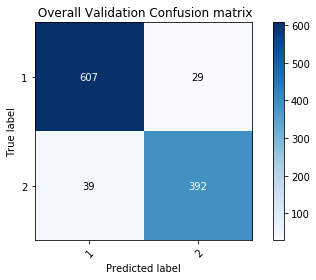

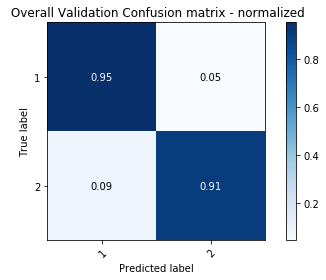

In [26]:
#compute Confusion Matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2],title=' Overall Validation Confusion matrix')
#compute Confusion Matrix normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2], normalize = True,title= ' Overall Validation Confusion matrix - normalized')

## 3 Classes classification

In [27]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 6,
# 2nd class if 6 <= "months until dialysis" < 18
# 3rd class otherwise
def get_class_for_3_classes_classification(months_until_dialysis):
    if months_until_dialysis < 6:
        return 1
    if (6 <= months_until_dialysis) and (months_until_dialysis < 18):
        return 2
    else:
        return 3

In [28]:
training['class'] = training.apply(lambda x : get_class_for_3_classes_classification( x["months until dialysis"]),axis=1)

In [29]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : get_class_for_3_classes_classification( x["months until dialysis"]),axis=1)

In [30]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [31]:
Xtest = test[SELECTED_27_FEATURES]
Xtest.shape

(1067, 27)

#### To train a new binary classifier run the cell below:

In [32]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_3Classes = ExtraTreesClassifier(n_estimators=180)
#train the classifier
clf_3Classes.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

#### To load a pre-trained model run the cell below instead:

In [33]:
#load already trained model
clf_3Classes = load('clf_3Classes.joblib') 

In [34]:
# Make predictions on test
y_pred_test = clf_3Classes.predict(Xtest)

In [35]:
#compute accuracy
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.8847235238987816


In [36]:
#compute precision
compute_precision(Ytest,y_pred_test)
print()
#compute recall
compute_recall(Ytest,y_pred_test)
print()
#compute F1
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.8860919769356279
 micro precision: 0.8847235238987816
 weighted precision: 0.8850646347151048

 macro recall: 0.8799250388235912
 micro recall: 0.8847235238987816
 weighted recall: 0.8847235238987816

 macro f1_score: 0.8826446414007177
 micro f1_score: 0.8847235238987816
 weighted f1_score: 0.8845448905392547


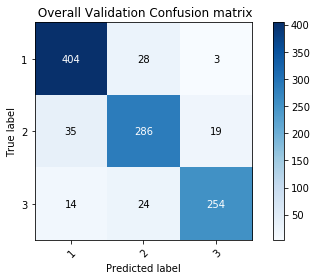

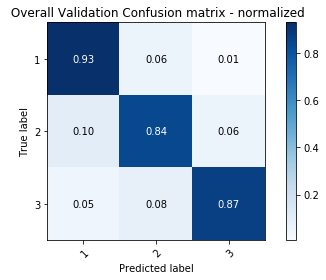

In [37]:
# plot confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3],title=' Overall Validation Confusion matrix')
# plot confusion normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3], normalize = True,title= ' Overall Validation Confusion matrix - normalized')

## 4 Classes classification

In [38]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 6,
# 2nd class if 6 <= "months until dialysis" < 14
# 3rd class if 14 <= "months until dialysis" < 24
# 4th class otherwise
def get_class_for_4_classes_classification(months_until_dialysis):
    if months_until_dialysis < 6:
        return 1
    if (6 <= months_until_dialysis) and (months_until_dialysis < 14):
        return 2
    if (14 <= months_until_dialysis) and (months_until_dialysis < 24):
        return 3
    else:
        return 4

In [39]:
training['class'] = training.apply(lambda x : get_class_for_4_classes_classification( x["months until dialysis"]),axis=1)

In [40]:
#compute the corresponding classes also for the test set
test['class'] = test.apply(lambda x : get_class_for_4_classes_classification( x["months until dialysis"]),axis=1)

In [41]:
#train only on the 27 selected features
Xtrain = training[SELECTED_27_FEATURES]
print("Train features shape: " + str(Xtrain.shape))
Ytrain = training['class']

Train features shape: (3199, 27)


In [42]:
Xtest = test[SELECTED_27_FEATURES]
Xtest.shape

(1067, 27)

#### To train a new binary classifier run the cell below:

In [43]:
#define an Etratrees classifier with a given number of estimators (i.e. 180). 
#The number of estimators is an hyperparameter and can be tuned with crossvalidation on the training set
clf_4Classes = ExtraTreesClassifier(n_estimators=180)
#train the classifier
clf_4Classes.fit(Xtrain,Ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=180,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

#### To load a pre-trained model run the cell below instead:

In [44]:
#load already trained model
clf_4Classes = load('clf_4Classes.joblib') 

In [45]:
# Make predictions on test
y_pred_test = clf_4Classes.predict(Xtest)

In [46]:
#compute accuracy
test_accuracy = accuracy_score(Ytest,y_pred_test)
print(test_accuracy)

0.8603561387066542


In [47]:
#compute precision 
compute_precision(Ytest,y_pred_test)
print()
#compute recall
compute_recall(Ytest,y_pred_test)
print()
#compute F1
compute_f1_score(Ytest,y_pred_test)

 macro precision: 0.8529333625454479
 micro precision: 0.8603561387066542
 weighted precision: 0.8591540766403143

 macro recall: 0.8309828436794975
 micro recall: 0.8603561387066542
 weighted recall: 0.8603561387066542

 macro f1_score: 0.8406872300844054
 micro f1_score: 0.8603561387066542
 weighted f1_score: 0.8585320469716464


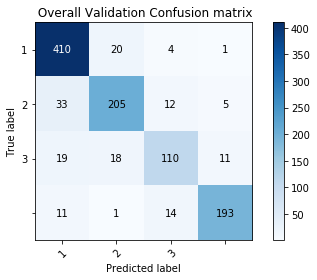

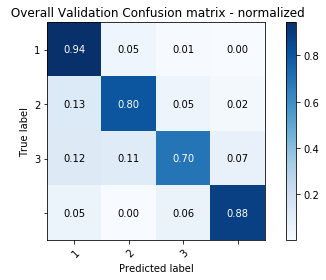

In [48]:
#plot confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3],title=' Overall Validation Confusion matrix')
#plot confusion matrix normalized        
plot_confusion_matrix(Ytest, y_pred_test, classes=[1,2,3], normalize = True,title= ' Overall Validation Confusion matrix - normalized')